## **Phân tích cổ phiếu Công ty Cổ phần Sữa Việt Nam (VNM)**

### **Thành viên:**

#### 1. Nguyễn Thị Minh Ly - K68A-AI1 - MSV: 23020399
#### 2. Đặng Minh Nguyệt - K68A-AI1 - MSV: 23020407

## **1. Quan sát để hiểu doanh nghiệp và dữ liệu**

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1.1. Financial Indicator

In [117]:
df_fin = pd.read_excel("data\Simplize_VNM_FinancialIndicator_20250315.xlsx")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# check for header rows
df_fin = pd.read_excel("data\Simplize_VNM_FinancialIndicator_20250315.xlsx", header=None)
header_row = None
for i, row in df_fin.iterrows():
    if row.astype(str).str.contains("CHỈ TIÊU", case=False, na=False).any():
        header_row = i
        break

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# block rows before header
df_fin = pd.read_excel("data\Simplize_VNM_FinancialIndicator_20250315.xlsx", header=header_row)
df_fin.columns = [str(c).strip() for c in df_fin.columns]
df_fin = df_fin.dropna(how='all')

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# identify quarter columns
quarter_cols = [c for c in df_fin.columns if any(q in str(c) for q in ['Q', '/202'])]

quarter_cols

['Q4/2024',
 'Q3/2024',
 'Q2/2024',
 'Q1/2024',
 'Q4/2023',
 'Q3/2023',
 'Q2/2023',
 'Q1/2023',
 'Q4/2022',
 'Q3/2022',
 'Q2/2022',
 'Q1/2022',
 'Q4/2021',
 'Q3/2021',
 'Q2/2021',
 'Q1/2021',
 'Q4/2020',
 'Q3/2020',
 'Q2/2020',
 'Q1/2020',
 'Q4/2019',
 'Q3/2019',
 'Q2/2019',
 'Q1/2019',
 'Q4/2018',
 'Q3/2018',
 'Q2/2018',
 'Q1/2018',
 'Q4/2017',
 'Q3/2017',
 'Q2/2017',
 'Q1/2017',
 'Q4/2016',
 'Q3/2016',
 'Q2/2016',
 'Q1/2016',
 'Q4/2015',
 'Q3/2015',
 'Q2/2015',
 'Q1/2015']

In [ ]:
# get rid of category rows
col_name = 'CHỈ TIÊU'

df_fin[col_name] = df_fin[col_name].astype(str).str.strip()
df_fin['_is_category'] = df_fin[quarter_cols].isna().all(axis=1)

df_fin = df_fin[df_fin['_is_category'] == False].drop(columns=['_is_category'])

In [ ]:
# get rid of rows with no data in quarter columns
df_fin = df_fin[df_fin[quarter_cols].notna().any(axis=1)]

In [ ]:
# normalize quarter columns
def clean_value(val):
    if pd.isna(val):
        return np.nan
    s = str(val).strip()
    if s.endswith('%'):
        s = s[:-1].replace(',', '.')
        try:
            return float(s) / 100
        except:
            return np.nan
    try:
        return float(s.replace(',', '').replace(' ', ''))
    except:
        return np.nan

df_fin[quarter_cols] = df_fin[quarter_cols].apply(lambda col: col.apply(clean_value))

In [127]:
df_fin[:5]

,CHỈ TIÊU,Q4/2024,Q3/2024,Q2/2024,Q1/2024,Q4/2023,Q3/2023,Q2/2023,Q1/2023,Q4/2022,...,Q2/2017,Q1/2017,Q4/2016,Q3/2016,Q2/2016,Q1/2016,Q4/2015,Q3/2015,Q2/2015,Q1/2015
1,Doanh thu thuần,15477073125441.00,15537337313473.00,16655787772473.00,14112411317058.00,15618710944490.00,15636987684682.00,15194824955693.00,13918391926640.00,15068654657453.00,...,13348261215191.00,12049368692438.00,11807610749506.00,12204689711230.00,12449130059922.00,10332908879616.00,11098562112893.00,10549326431578.00,10500110637280.00,8716035913568.00
2,Tăng trưởng doanh thu,-0.01,-0.01,0.10,0.01,0.04,-0.03,0.02,0.00,-0.05,...,0.07,0.17,0.06,0.16,0.19,0.19,0.19,0.21,0.14,0.14
3,Lợi nhuận gộp,6209690644985.00,6401445454290.00,7067518779284.00,5911521444565.00,6441612591490.00,6554900643375.00,6150192068886.00,5398026311659.00,5845588412045.00,...,6540841887346.00,5819131316070.00,5480295049931.00,5085428772710.00,5372695831441.00,5026711161429.00,4416387446733.00,4350059534037.00,4386995984476.00,3108971976990.00
4,Tăng trưởng lợi nhuận gộp,-0.04,-0.02,0.15,0.10,0.10,0.03,0.01,-0.04,-0.13,...,0.22,0.16,0.24,0.17,0.22,0.62,0.24,0.44,0.39,0.21
5,Lợi nhuận thuần từ HĐKD,2581919225696.00,2970748116715.00,3325773210703.00,2715537085273.00,2725822436482.00,3086270738943.00,2776744398740.00,2314795307642.00,2229048854727.00,...,3443226703496.00,3470305276126.00,2145563296248.00,3048044079391.00,3373259219955.00,2593424063941.00,2228598262186.00,2554910647754.00,2621118916415.00,1872171414488.00


In [131]:
# set col 0 as index
df2 = df_fin.set_index(df_fin.columns[0])

# get only numeric columns (exclude col 0)
df_numeric = df2.apply(pd.to_numeric, errors='coerce')

summary = df_numeric.T.describe().T

summary = summary.rename(columns={
    "min": "min",
    "25%": "Q1",
    "50%": "median",
    "75%": "Q3",
    "max": "max",
    "mean": "average",
    "std": "std",
    "variance": "variance"
})

summary["variance"] = df_numeric.T.var().values

In [133]:
summary[:5]

,count,average,std,min,Q1,median,Q3,max,variance
CHỈ TIÊU,,,,,,,,,
Doanh thu thuần,40.00,13756068660577.47,1871424029095.31,8716035913568.00,12424439584226.50,14015401621849.00,15481613283780.50,16655787772473.00,3502227896675305942679552.00
Tăng trưởng doanh thu,40.00,0.06,0.07,-0.07,0.01,0.05,0.10,0.21,0.00
Lợi nhuận gộp,40.00,6015609450533.85,883079667533.60,3108971976990.00,5574577547434.25,6186138028562.00,6618902131330.75,7266743481136.00,779829699211252635533312.00
Tăng trưởng lợi nhuận gộp,40.00,0.09,0.16,-0.13,-0.02,0.05,0.16,0.62,0.02
Lợi nhuận thuần từ HĐKD,40.00,2914819690901.20,473655903516.74,1872171414488.00,2616073118612.50,2921378136383.50,3329638734259.75,3755879519012.00,224349914936260222255104.00


### 1.2. Price History

In [134]:
df_price = pd.read_excel("data\Simplize_VNM_PriceHistory_20250315.xlsx")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [135]:
# check for header rows
df_price = pd.read_excel("data\Simplize_VNM_PriceHistory_20250315.xlsx", header=None)
header_row = None
for i, row in df_price.iterrows():
    if row.astype(str).str.contains("GIÁ MỞ CỬA", case=False, na=False).any():
        header_row = i
        break

df_price = pd.read_excel("data\Simplize_VNM_PriceHistory_20250315.xlsx", header=header_row)
df_price.columns = [str(c).strip() for c in df_price.columns]
df_price = df_price.dropna(how='all')

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [136]:
# keeps valid dates
df_price = df_price[pd.to_datetime(df_price['NGÀY'], dayfirst=True, errors='coerce').notna()]

# turn into datetime values
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], dayfirst=True)

In [137]:
df_price

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,2025-03-14,62400.00,62700.00,62100.00,62100.00,100.00,0.00,2696700.00
1,2025-03-13,62300.00,62900.00,61900.00,62000.00,-200.00,-0.00,5100400.00
2,2025-03-12,62500.00,62800.00,62200.00,62200.00,-200.00,-0.00,2755400.00
3,2025-03-11,62300.00,62500.00,62100.00,62400.00,-100.00,-0.00,2287600.00
4,2025-03-10,63000.00,63000.00,62500.00,62500.00,-200.00,-0.00,2529500.00
...,...,...,...,...,...,...,...,...
995,2021-03-19,84277.83,84277.83,83618.12,83865.51,NaN,NaN,3884100.00
996,2021-03-18,83288.27,84525.22,83288.27,84525.22,NaN,NaN,2608900.00
997,2021-03-17,83288.27,83288.27,82546.09,82875.95,NaN,NaN,3568400.00
998,2021-03-16,84277.83,84360.29,82546.09,83288.27,NaN,NaN,4314700.00


In [143]:
summary2 = df_price.describe().T

summary2 = summary2.rename(columns={
    "min": "min",
    "25%": "Q1",
    "50%": "median",
    "75%": "Q3",
    "max": "max",
    "mean": "average",
    "std": "std",
    "variance": "variance"
})

summary2["variance"] = summary2.index.map(
    lambda col: df_price[col].var() if col in df_price.select_dtypes(include=np.number).columns else np.nan
)

summary2

,count,average,min,Q1,median,Q3,max,std,variance
NGÀY,1000,2023-03-13 01:56:38.400000,2021-03-15 00:00:00,2022-03-14 18:00:00,2023-03-14 12:00:00,2024-03-13 06:00:00,2025-03-14 00:00:00,NaN,NaN
GIÁ MỞ CỬA,1000.00,68190.56,56214.81,64018.15,67571.00,72110.90,86174.49,5260.29,27670701.21
GIÁ CAO NHẤT,1000.00,68783.36,57423.73,64495.34,68099.15,72710.85,86174.49,5284.93,27930451.27
GIÁ THẤP NHẤT,1000.00,67603.14,55696.70,63611.65,67037.38,71477.98,84277.83,5192.61,26963152.25
GIÁ ĐÓNG CỬA,1000.00,68111.67,55696.70,63992.72,67571.00,72051.66,84690.15,5246.75,27528360.66
THAY ĐỔI GIÁ,547.00,-14.99,-2500.00,-500.00,-100.00,400.00,3900.00,811.30,658199.77
% THAY ĐỔI,547.00,-0.00,-0.03,-0.01,-0.00,0.01,0.06,0.01,0.00
KHỐI LƯỢNG,1000.00,3131697.22,691300.00,1932900.00,2702950.00,3882825.00,21564900.00,1819471.43,3310476277282.17


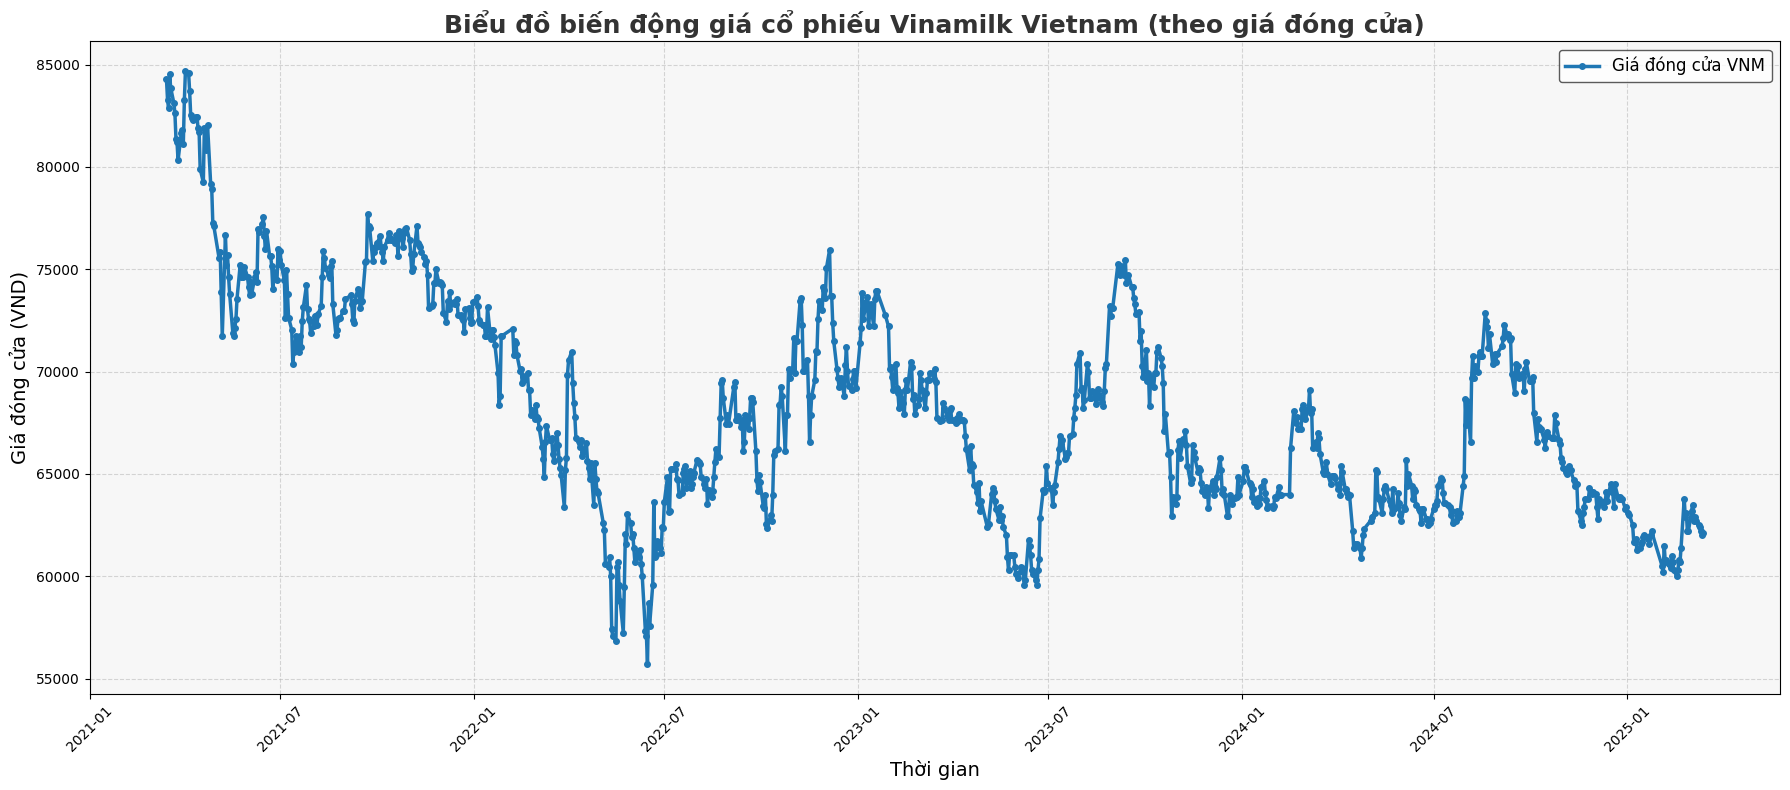

In [153]:
plt.figure(figsize=(18, 8))

plt.plot(df_price['NGÀY'], df_price['GIÁ ĐÓNG CỬA'], 
         color='#1f77b4', linewidth=2.5, marker='o', markersize=4, label='Giá đóng cửa VNM')
plt.title('Biểu đồ biến động giá cổ phiếu Vinamilk Vietnam (theo giá đóng cửa)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Thời gian', fontsize=14)
plt.ylabel('Giá đóng cửa (VND)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, facecolor='white', edgecolor='#333333', fontsize=12)
plt.xticks(rotation=45)

plt.gca().set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()


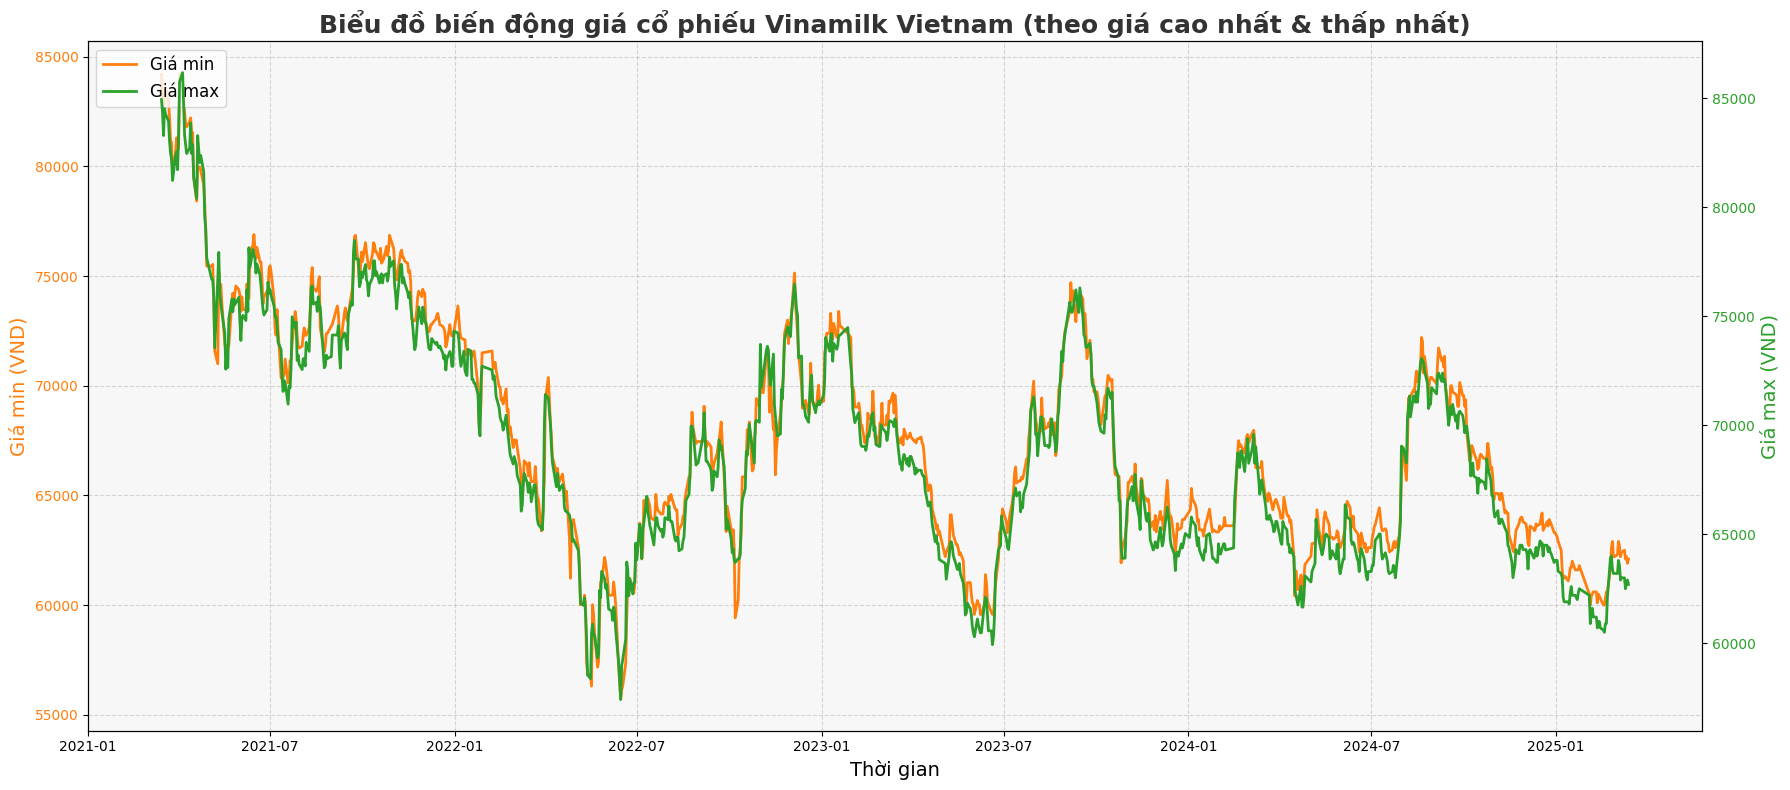

In [160]:
fig, ax1 = plt.subplots(figsize=(18, 8))

# min
color_min = '#ff7f0e'
ax1.set_xlabel('Thời gian', fontsize=14)
ax1.set_ylabel('Giá min (VND)', color=color_min, fontsize=14)
ax1.plot(df_price['NGÀY'], df_price['GIÁ THẤP NHẤT'], color=color_min, linewidth=2, label='Giá min')
ax1.tick_params(axis='y', labelcolor=color_min)
ax1.grid(True, linestyle='--', alpha=0.5)

# max
ax2 = ax1.twinx()  
color_max = '#2ca02c'
ax2.set_ylabel('Giá max (VND)', color=color_max, fontsize=14)
ax2.plot(df_price['NGÀY'], df_price['GIÁ CAO NHẤT'], color=color_max, linewidth=2, label='Giá max')
ax2.tick_params(axis='y', labelcolor=color_max)

plt.title('Biểu đồ biến động giá cổ phiếu Vinamilk Vietnam (theo giá cao nhất & thấp nhất)', fontsize=18, fontweight='bold', color='#333333')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', frameon=True, fontsize=12)

ax1.set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()


# **2. Tiền xử lý dữ liệu**

Ở mục này, ta thực hiện việc merge hai bảng, đầu tiên với bảng Financial Indicator

### 2.1. Financial Indicator

In [38]:
df_fin = df_fin.set_index(df_fin.columns[0])


In [ ]:
# get required indices
df_fin_mod = df_fin.loc[['Biên lợi nhuận gộp', 'Biên lợi nhuận ròng', 'P/E', 'EPS (VNĐ/CP)',
                          'Tăng trưởng EPS', 'ROE LTM', 'Nợ phải trả / Vốn chủ sở hữu',
                          'Khả năng thanh toán tổng quát','Vòng quay tài sản (vòng)', 'Giá trị sổ sách (VNĐ/CP)']]
df_fin_mod = df_fin_mod.iloc[:,:16]

In [187]:
df_fin_mod

,Q4/2024,Q3/2024,Q2/2024,Q1/2024,Q4/2023,Q3/2023,Q2/2023,Q1/2023,Q4/2022,Q3/2022,Q2/2022,Q1/2022,Q4/2021,Q3/2021,Q2/2021,Q1/2021
CHỈ TIÊU,,,,,,,,,,,,,,,,
Biên lợi nhuận gộp,0.40,0.41,0.42,0.42,0.41,0.42,0.40,0.39,0.39,0.39,0.41,0.41,0.43,0.43,0.44,0.44
Biên lợi nhuận ròng,0.14,0.15,0.16,0.16,0.15,0.16,0.15,0.14,0.12,0.14,0.14,0.16,0.14,0.18,0.18,0.20
P/E,14.16,15.69,14.97,16.02,17.17,18.93,17.92,18.77,18.43,16.20,14.62,16.07,17.58,17.08,17.59,20.12
EPS (VNĐ/CP),1016.12,1150.03,1277.77,1050.10,1112.95,1192.49,1052.09,888.41,894.34,1099.74,996.66,1084.00,1050.74,1399.92,1356.39,1232.52
Tăng trưởng EPS,-0.09,-0.04,0.21,0.18,0.24,0.08,0.06,-0.18,-0.15,-0.21,-0.27,-0.12,0.01,-0.05,-0.08,-0.22
ROE LTM,0.27,0.28,0.26,0.26,0.27,0.25,0.23,0.24,0.25,0.26,0.27,0.30,0.31,0.33,0.32,0.33
Nợ phải trả / Vốn chủ sở hữu,0.52,0.64,0.41,0.44,0.50,0.62,0.39,0.43,0.48,0.51,0.46,0.52,0.49,0.54,0.54,0.50
Khả năng thanh toán tổng quát,2.92,2.57,3.42,3.27,2.98,2.62,3.56,3.34,3.09,2.95,3.16,2.94,3.05,2.86,2.84,2.99
Vòng quay tài sản (vòng),0.27,0.28,0.31,0.27,0.29,0.30,0.30,0.28,0.30,0.31,0.28,0.26,0.30,0.31,0.30,0.27


### 2.2. Price History
Tiếp tục thực hiện với bảng Price History

In [ ]:
# get required indices
df_price_mod = df_price[['NGÀY', 'GIÁ ĐÓNG CỬA', 'THAY ĐỔI GIÁ', '% THAY ĐỔI']].copy()
df_price_mod['QUÝ'] = df_price_mod['NGÀY'].dt.quarter
df_price_mod['NĂM'] = df_price_mod['NGÀY'].dt.year
df_price_mod[:5]

,NGÀY,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,QUÝ,NĂM
0,2025-03-14,62100.00,100.00,0.00,1,2025
1,2025-03-13,62000.00,-200.00,-0.00,1,2025
2,2025-03-12,62200.00,-200.00,-0.00,1,2025
3,2025-03-11,62400.00,-100.00,-0.00,1,2025
4,2025-03-10,62500.00,-200.00,-0.00,1,2025


In [ ]:
# get the last day of each quarter
last_days = df_price_mod.groupby(['NĂM', 'QUÝ'])['NGÀY'].max().reset_index()
last_days = last_days.sort_values(by=['NĂM', 'QUÝ'], ascending=[False, False]).reset_index(drop=True)
last_days

,NĂM,QUÝ,NGÀY
0,2025,1,2025-03-14
1,2024,4,2024-12-31
2,2024,3,2024-09-30
3,2024,2,2024-06-28
4,2024,1,2024-03-29
5,2023,4,2023-12-29
6,2023,3,2023-09-29
7,2023,2,2023-06-30
8,2023,1,2023-03-31
9,2022,4,2022-12-30


In [168]:
average_values = []

for _, quarter_row in last_days.iterrows():
    # get the average values for existing indices 
    end_day = quarter_row['NGÀY']
    window_mask = df_price_mod['NGÀY'].between(end_day - pd.Timedelta(days=14), end_day + pd.Timedelta(days=14))
    window_df = df_price_mod.loc[window_mask]

    avg_close = window_df['GIÁ ĐÓNG CỬA'].mean()
    avg_change = window_df['THAY ĐỔI GIÁ'].mean()
    avg_pct_change = window_df['% THAY ĐỔI'].mean()

    average_values.append({
        'NĂM': quarter_row['NĂM'],
        'QUÝ': quarter_row['QUÝ'],
        'Ngày cuối quý': end_day,
        'Giá đóng cửa': avg_close,
        'Thay đổi giá': avg_change,
        '% Thay đổi': avg_pct_change
    })

In [169]:
df_price_avg = pd.DataFrame(average_values)
df_price_avg['QUÝ/NĂM'] = 'Q' + df_price_avg['QUÝ'].astype(str) + '/' + df_price_avg['NĂM'].astype(str)
df_price_avg

,NĂM,QUÝ,Ngày cuối quý,Giá đóng cửa,Thay đổi giá,% Thay đổi,QUÝ/NĂM
0,2025,1,2025-03-14,62581.82,-9.09,-0.00,Q1/2025
1,2024,4,2024-12-31,63009.81,-145.00,-0.00,Q4/2024
2,2024,3,2024-09-30,68946.07,-157.14,-0.00,Q3/2024
3,2024,2,2024-06-28,63419.11,-28.57,-0.00,Q2/2024
4,2024,1,2024-03-29,64743.29,-138.10,-0.00,Q1/2024
5,2023,4,2023-12-29,64141.01,-35.00,-0.00,Q4/2023
6,2023,3,2023-09-29,71375.98,-171.43,-0.00,Q3/2023
7,2023,2,2023-06-30,63729.72,333.33,0.00,Q2/2023
8,2023,1,2023-03-31,67674.94,-171.43,-0.00,Q1/2023
9,2022,4,2022-12-30,71131.20,360.00,0.00,Q4/2022


Các giá trị Thay đổi giá và % Thay đổi từ Q1/2021 - Q3/2022 bị thiếu. Để đảm bảo tính nhất quán của dữ liệu, nhóm sử dụng phương pháp Time Series Regression (dựa trên Autoregressive model AR1) để dự đoán giá trị thiếu. 

In [170]:
from statsmodels.tsa.ar_model import AutoReg

# order date in ascending order
df_price_avg = df_price_avg.sort_values(["NĂM","QUÝ"], ascending=[True,True]).reset_index(drop=True)

# fit AR(1) in the existing data
train = df_price_avg["Giá đóng cửa"].dropna()
ar_model = AutoReg(train, lags=1, old_names=False).fit()

# prediction function
def fill_missing_prices(series, model):
    prices = series.copy()
    for i in range(len(prices)):
        if np.isnan(prices[i]):
            # if i > 0 & previous GIÁ_fill exists -> forward AR(1)
            if i > 0 and not np.isnan(prices[i-1]):
                prices[i] = model.params[0] + model.params[1]*prices[i-1]
            # if i == 0 or previous GIÁ_fill NaN -> backward AR(1)
            else:
                j = i + 1
                while j < len(prices) and np.isnan(prices[j]):
                    j += 1
                if j < len(prices):
                    prices[i] = (prices[j] - model.params[0])/model.params[1]
    return prices

df_price_avg["Giá_fill"] = fill_missing_prices(df_price_avg["Giá đóng cửa"].values, ar_model)

# calculate 
df_price_avg["Thay đổi giá"] = df_price_avg["Giá_fill"].diff()
df_price_avg["% Thay đổi"] = df_price_avg["Thay đổi giá"] / df_price_avg["Giá_fill"].shift(1)

print(df_price_avg[["NĂM","QUÝ","Giá_fill","Thay đổi giá","% Thay đổi"]])

     NĂM  QUÝ  Giá_fill  Thay đổi giá  % Thay đổi
0   2021    1  82612.85           NaN         NaN
1   2021    2  74468.89      -8143.96       -0.10
2   2021    3  75974.19       1505.30        0.02
3   2021    4  72629.58      -3344.61       -0.04
4   2022    1  66900.81      -5728.77       -0.08
5   2022    2  62667.03      -4233.77       -0.06
6   2022    3  65269.36       2602.33        0.04
7   2022    4  71131.20       5861.84        0.09
8   2023    1  67674.94      -3456.27       -0.05
9   2023    2  63729.72      -3945.21       -0.06
10  2023    3  71375.98       7646.25        0.12
11  2023    4  64141.01      -7234.96       -0.10
12  2024    1  64743.29        602.28        0.01
13  2024    2  63419.11      -1324.18       -0.02
14  2024    3  68946.07       5526.96        0.09
15  2024    4  63009.81      -5936.26       -0.09
16  2025    1  62581.82       -427.99       -0.01


In [174]:
df_price_avg_T = df_price_avg.set_index('QUÝ/NĂM')[['Giá đóng cửa', 'Thay đổi giá', '% Thay đổi']].T
df_price_avg_T = df_price_avg_T[df_price_avg_T.columns[::-1]]
df_price_avg_T

QUÝ/NĂM,Q1/2025,Q4/2024,Q3/2024,Q2/2024,Q1/2024,Q4/2023,Q3/2023,Q2/2023,Q1/2023,Q4/2022,Q3/2022,Q2/2022,Q1/2022,Q4/2021,Q3/2021,Q2/2021,Q1/2021
Giá đóng cửa,62581.82,63009.81,68946.07,63419.11,64743.29,64141.01,71375.98,63729.72,67674.94,71131.20,65269.36,62667.03,66900.81,72629.58,75974.19,74468.89,82612.85
Thay đổi giá,-427.99,-5936.26,5526.96,-1324.18,602.28,-7234.96,7646.25,-3945.21,-3456.27,5861.84,2602.33,-4233.77,-5728.77,-3344.61,1505.30,-8143.96,NaN
% Thay đổi,-0.01,-0.09,0.09,-0.02,0.01,-0.10,0.12,-0.06,-0.05,0.09,0.04,-0.06,-0.08,-0.04,0.02,-0.10,NaN


### 2.3. Merged Table
Cuối cùng, ta thực hiện việc gộp 2 bảng

In [175]:
df = pd.concat([df_price_avg_T, df_fin_mod])
df = df.rename_axis('Thời gian')
df = df.drop(columns=['Q1/2025'])
df

,Q4/2024,Q3/2024,Q2/2024,Q1/2024,Q4/2023,Q3/2023,Q2/2023,Q1/2023,Q4/2022,Q3/2022,Q2/2022,Q1/2022,Q4/2021,Q3/2021,Q2/2021,Q1/2021
Thời gian,,,,,,,,,,,,,,,,
Giá đóng cửa,63009.81,68946.07,63419.11,64743.29,64141.01,71375.98,63729.72,67674.94,71131.20,65269.36,62667.03,66900.81,72629.58,75974.19,74468.89,82612.85
Thay đổi giá,-5936.26,5526.96,-1324.18,602.28,-7234.96,7646.25,-3945.21,-3456.27,5861.84,2602.33,-4233.77,-5728.77,-3344.61,1505.30,-8143.96,NaN
% Thay đổi,-0.09,0.09,-0.02,0.01,-0.10,0.12,-0.06,-0.05,0.09,0.04,-0.06,-0.08,-0.04,0.02,-0.10,NaN
Biên lợi nhuận gộp,0.40,0.41,0.42,0.42,0.41,0.42,0.40,0.39,0.39,0.39,0.41,0.41,0.43,0.43,0.44,0.44
Biên lợi nhuận ròng,0.14,0.15,0.16,0.16,0.15,0.16,0.15,0.14,0.12,0.14,0.14,0.16,0.14,0.18,0.18,0.20
P/E,14.16,15.69,14.97,16.02,17.17,18.93,17.92,18.77,18.43,16.20,14.62,16.07,17.58,17.08,17.59,20.12
EPS (VNĐ/CP),1016.12,1150.03,1277.77,1050.10,1112.95,1192.49,1052.09,888.41,894.34,1099.74,996.66,1084.00,1050.74,1399.92,1356.39,1232.52
Tăng trưởng EPS,-0.09,-0.04,0.21,0.18,0.24,0.08,0.06,-0.18,-0.15,-0.21,-0.27,-0.12,0.01,-0.05,-0.08,-0.22
ROE LTM,0.27,0.28,0.26,0.26,0.27,0.25,0.23,0.24,0.25,0.26,0.27,0.30,0.31,0.33,0.32,0.33


# **3. Lựa chọn các yếu tố nguy cơ tiềm năng cho mô hình tài chính**

In [ ]:
df_temp = df.T
df_temp

Mốc thời gian(quý/năm),Giá đóng cửa,Thay đổi giá,% Thay đổi,Biên lợi nhuận gộp,Biên lợi nhuận ròng,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Q4/2024,63009.81,-5936.26,-0.09,0.40,0.14,14.16,1016.12,-0.09,0.27,0.52,2.92,0.27,15444.74
Q3/2024,68946.07,5526.96,0.09,0.41,0.15,15.69,1150.03,-0.04,0.28,0.64,2.57,0.28,15010.41
Q2/2024,63419.11,-1324.18,-0.02,0.42,0.16,14.97,1277.77,0.21,0.26,0.41,3.42,0.31,16433.90
Q1/2024,64743.29,602.28,0.01,0.42,0.16,16.02,1050.10,0.18,0.26,0.44,3.27,0.27,15241.55
Q4/2023,64141.01,-7234.96,-0.10,0.41,0.15,17.17,1112.95,0.24,0.27,0.50,2.98,0.29,15166.26
Q3/2023,71375.98,7646.25,0.12,0.42,0.16,18.93,1192.49,0.08,0.25,0.62,2.62,0.30,14668.05
Q2/2023,63729.72,-3945.21,-0.06,0.40,0.15,17.92,1052.09,0.06,0.23,0.39,3.56,0.30,16013.85
Q1/2023,67674.94,-3456.27,-0.05,0.39,0.14,18.77,888.41,-0.18,0.24,0.43,3.34,0.28,15072.85
Q4/2022,71131.20,5861.84,0.09,0.39,0.12,18.43,894.34,-0.15,0.25,0.48,3.09,0.30,14282.15
Q3/2022,65269.36,2602.33,0.04,0.39,0.14,16.20,1099.74,-0.21,0.26,0.51,2.95,0.31,14900.52


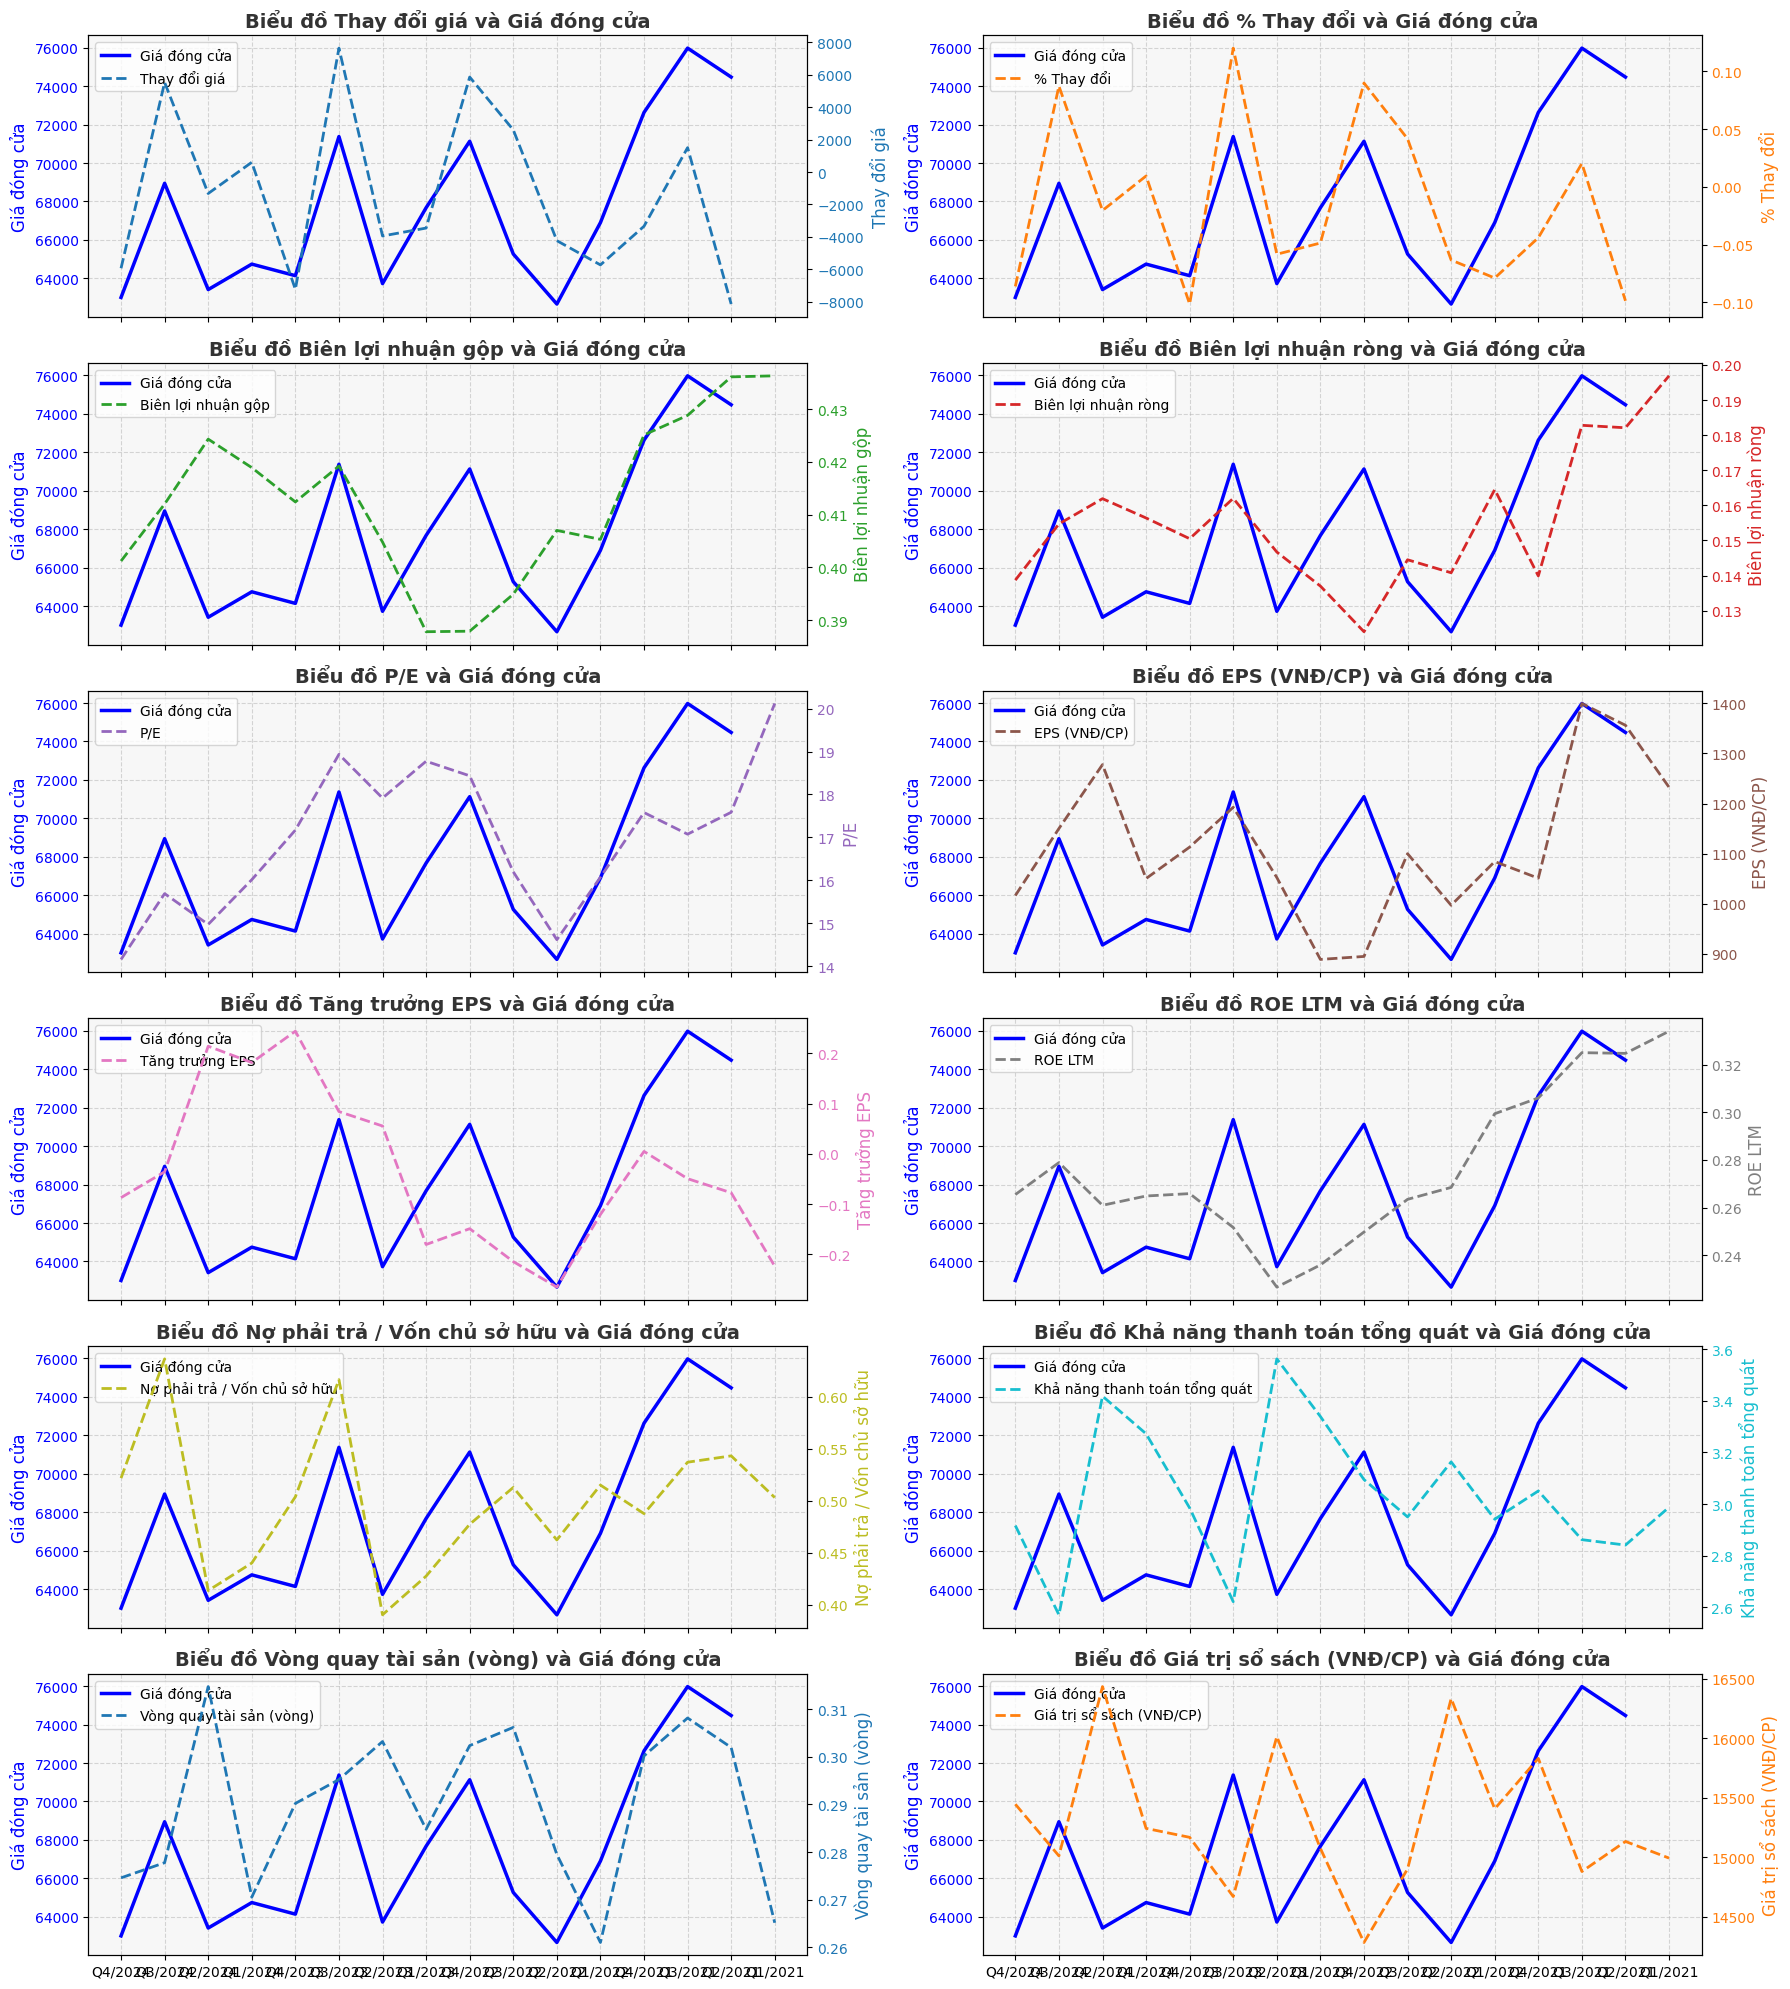

In [177]:

palette = sns.color_palette("tab10", n_colors=len(df_temp.columns))
cols_to_plot = [c for c in df_temp.columns if c != "Giá đóng cửa"]

fig, axes = plt.subplots(6, 2, figsize=(18, 20), sharex=True)
axes = axes.flatten()

for i, column in enumerate(cols_to_plot):
    ax1 = axes[i]
    color_main = "blue"
    ax1.set_ylabel("Giá đóng cửa", color=color_main, fontsize=12)
    ax1.plot(df_temp.index, df_temp["Giá đóng cửa"], color=color_main, linewidth=2.5, label="Giá đóng cửa")
    ax1.tick_params(axis="y", labelcolor=color_main)
    ax1.grid(True, linestyle='--', alpha=0.5)

    ax2 = ax1.twinx()
    color_col = palette[i]
    ax2.set_ylabel(column, color=color_col, fontsize=12)
    ax2.plot(df_temp.index, df_temp[column], color=color_col, linewidth=2, linestyle='--', label=column)
    ax2.tick_params(axis="y", labelcolor=color_col)

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

    ax1.set_facecolor('#f7f7f7')
    ax1.set_title(f"Biểu đồ {column} và Giá đóng cửa", fontsize=14, fontweight='bold', color='#333333')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [180]:
cols_to_numeric = ["Giá đóng cửa","Thay đổi giá","% Thay đổi",
                   "Biên lợi nhuận gộp","Biên lợi nhuận ròng",
                   "P/E","EPS (VNĐ/CP)","Tăng trưởng EPS",
                   "ROE LTM","Nợ phải trả / Vốn chủ sở hữu",
                   "Khả năng thanh toán tổng quát",
                   "Vòng quay tài sản (vòng)",
                   "Giá trị sổ sách (VNĐ/CP)"]

for col in cols_to_numeric:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')

numeric_cols = df_temp.select_dtypes(include=['float64','int']).columns
corr_matrix = df_temp[numeric_cols].corr(method='pearson')

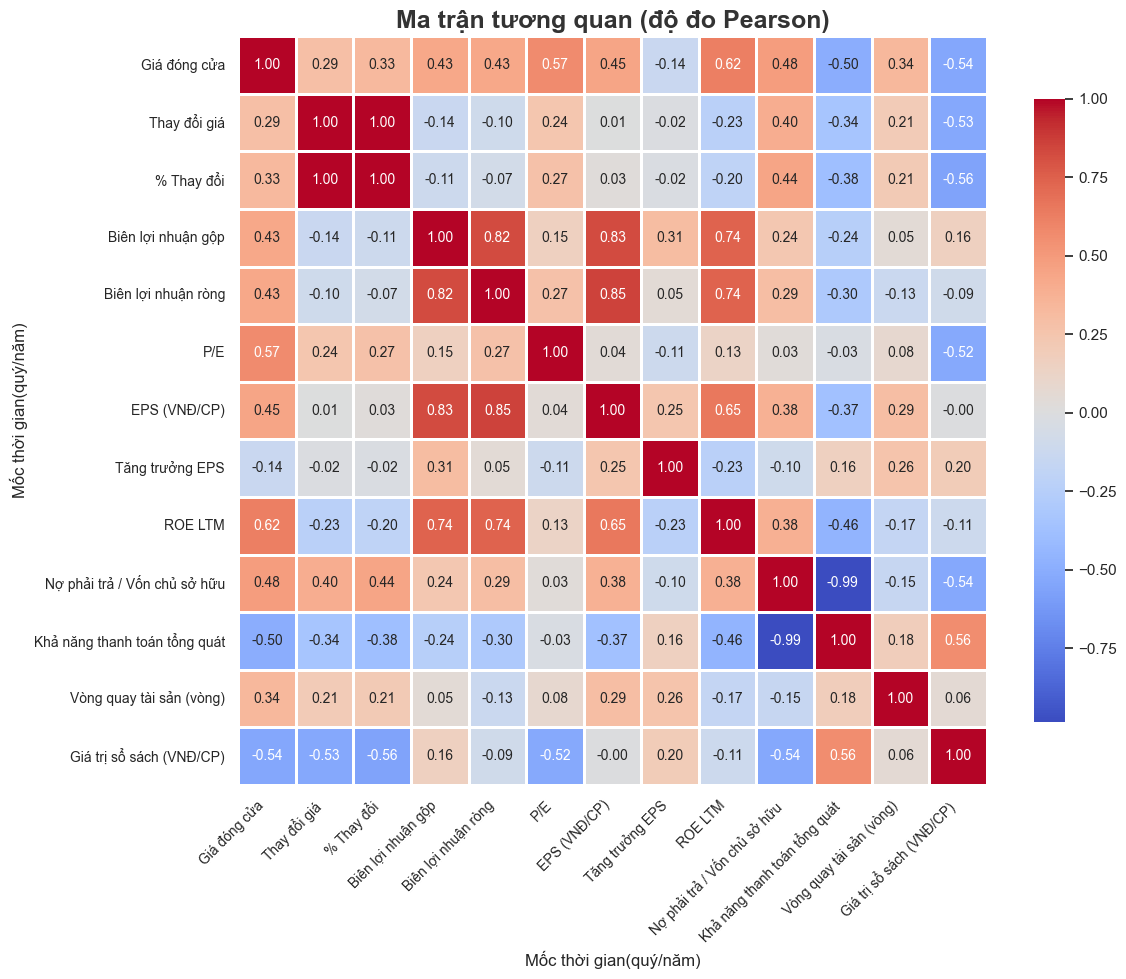

In [185]:
plt.figure(figsize=(12,10))
sns.set(style="white")

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=1, 
    linecolor='white', 
    cbar_kws={"shrink": 0.8}, 
    square=True,
    annot_kws={"size":10}
)

plt.title("Ma trận tương quan (độ đo Pearson)", fontsize=18, fontweight='bold', color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [184]:
corr_with_price = corr_matrix['Giá đóng cửa'].sort_values(ascending=False)
print(corr_with_price)

Mốc thời gian(quý/năm)
Giá đóng cửa                     1.00
ROE LTM                          0.62
P/E                              0.57
Nợ phải trả / Vốn chủ sở hữu     0.48
EPS (VNĐ/CP)                     0.45
Biên lợi nhuận ròng              0.43
Biên lợi nhuận gộp               0.43
Vòng quay tài sản (vòng)         0.34
% Thay đổi                       0.33
Thay đổi giá                     0.29
Tăng trưởng EPS                 -0.14
Khả năng thanh toán tổng quát   -0.50
Giá trị sổ sách (VNĐ/CP)        -0.54
Name: Giá đóng cửa, dtype: float64
